In [2]:
# packages, install if not already
# %pip install pandas
# %pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# obtain initial data from https://insideairbnb.com/get-the-data/
# listings, reviews csvs

In [2]:
# load data function
def load_data(city, list_path, review_path):
    # city string, prefix; paths for files, input initial data
    # joins on listing id
    list = pd.read_csv(list_path)
    list1 = list[['id','price']].rename(columns={'id': 'listing_id'})

    rev = pd.read_csv(review_path)
    rev1 = rev[['listing_id','id','comments']].rename(columns={'id': 'review_id'})

    rev_list=rev1.merge(list1, on='listing_id', how='left')
    city_data[city] = rev_list

# dictionary to hold city dfs
city_data = {}


In [3]:
# loading
load_data('Austin',r"C:\Users\vance\Desktop\project_folder\austin\listings.csv",r"C:\Users\vance\Desktop\project_folder\austin\reviews.csv")
load_data('Boston',r"C:\Users\vance\Desktop\project_folder\boston\listings.csv",r"C:\Users\vance\Desktop\project_folder\boston\reviews.csv")
load_data('Chicago',r"C:\Users\vance\Desktop\project_folder\chicago\listings.csv",r"C:\Users\vance\Desktop\project_folder\chicago\reviews.csv")
load_data('Clark_co',r"C:\Users\vance\Desktop\project_folder\clark_county\listings.csv",r"C:\Users\vance\Desktop\project_folder\clark_county\reviews.csv")
load_data('Dallas',r"C:\Users\vance\Desktop\project_folder\dallas\listings.csv",r"C:\Users\vance\Desktop\project_folder\dallas\reviews.csv")
load_data('Denver',r"C:\Users\vance\Desktop\project_folder\denver\listings.csv",r"C:\Users\vance\Desktop\project_folder\denver\reviews.csv")

In [4]:
# combine data, drop na
all_city = pd.concat(city_data.values(), keys=city_data.keys(), names=["city"]).reset_index(level=0).rename(columns={"level_0": "city"})
all_city.dropna(inplace=True)


In [5]:
# export and come back later
all_city.to_csv(r"C:\Users\vance\Desktop\project_folder\all_city.csv")

In [3]:
# load back
all_city = pd.read_csv(r"C:\Users\vance\Desktop\project_folder\all_city.csv")


In [4]:
# fix price string
all_city["price"] = all_city["price"].str.replace(r"[\$,]", "", regex=True).astype(float)

<Axes: title={'center': 'Price'}>

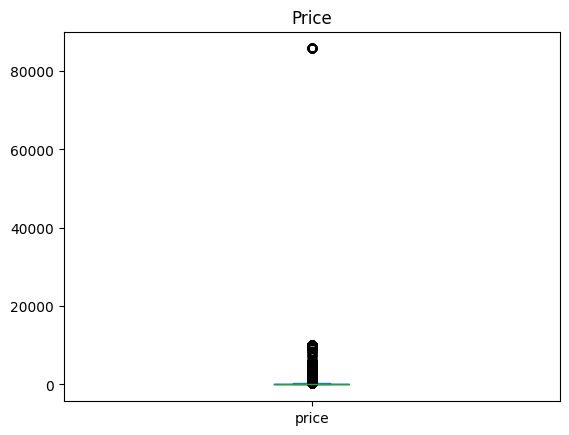

In [5]:
# eda plots- price
all_city['price'].plot(kind='box',title='Price')

<Axes: title={'center': 'Price'}>

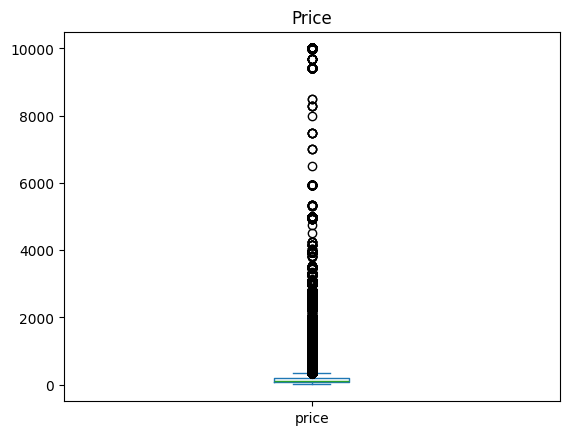

In [6]:
# remove outlier ~80,000
all_city = all_city[all_city['price']<40000]
# revised plot
all_city['price'].plot(kind='box', title='Price')

<Axes: title={'center': 'City'}, xlabel='city'>

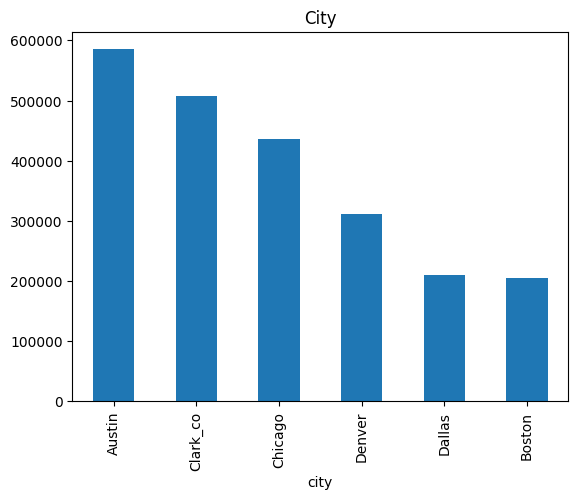

In [7]:
# eda- city distribution
all_city['city'].value_counts().plot(kind='bar', title='City')

<Axes: title={'center': 'Listing Reviews (reviews per listing)'}>

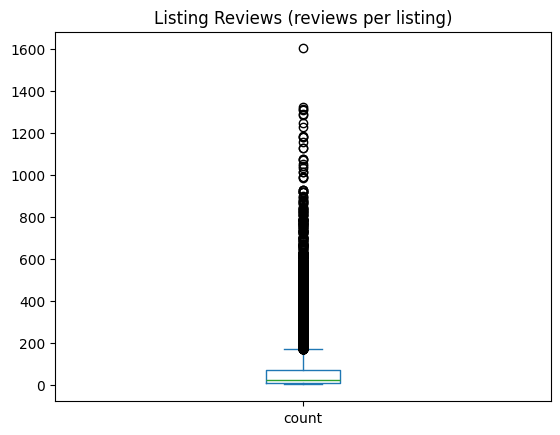

In [8]:
# eda- listing reviews
all_city['listing_id'].value_counts().plot(kind='box', title='Listing Reviews (reviews per listing)')

<Axes: title={'center': 'Listing Reviews (reviews per listing)'}>

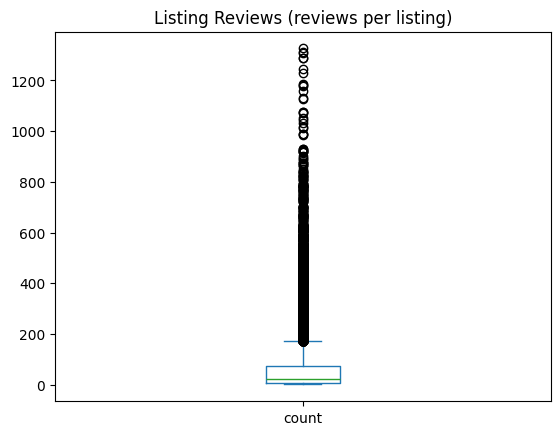

In [9]:
# remove outlier ~1,600, value_counts requires different drop method
all_city = all_city[~all_city['listing_id'].isin([all_city['listing_id'].value_counts().idxmax()])]
# revised plot
all_city['listing_id'].value_counts().plot(kind='box', title='Listing Reviews (reviews per listing)')

In [10]:
# sample listings with a review total within 1 stdev of the median review count
# median review count 24
listing_counts = all_city['listing_id'].value_counts()

median_val = listing_counts.median()
std_val = listing_counts.std()
med_id = listing_counts[(listing_counts >= (median_val - std_val)) & (listing_counts <= (median_val + std_val))].index

all_city = all_city[all_city['listing_id'].isin(med_id)]

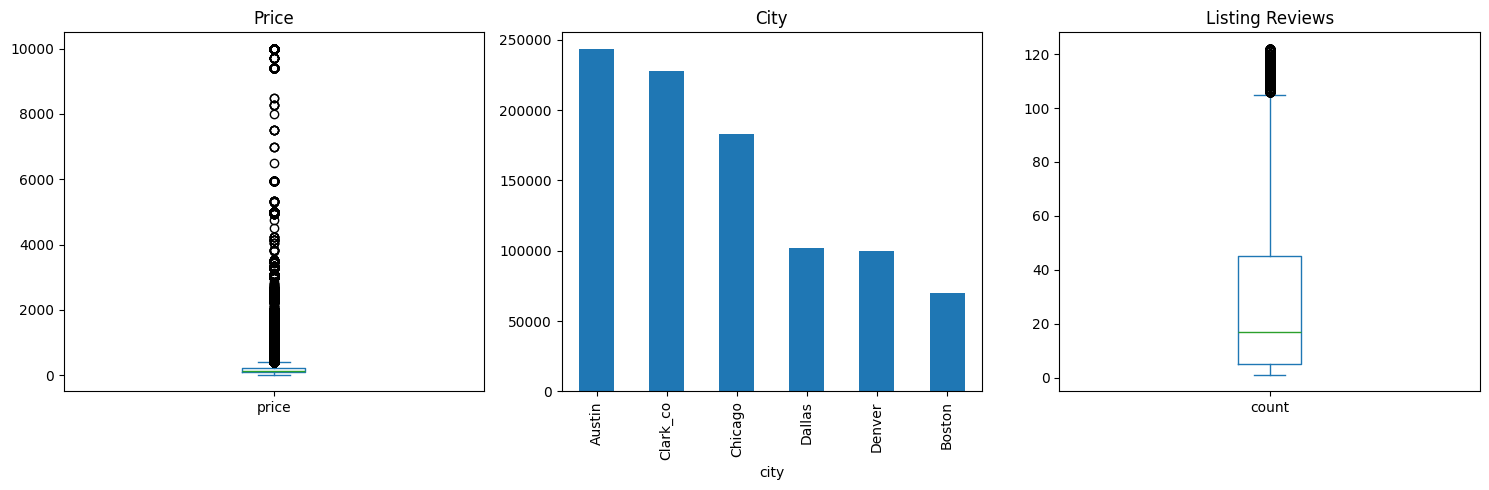

In [22]:
# combined plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
all_city['price'].plot(kind='box', title='Price', ax=axes[0])
all_city['city'].value_counts().plot(kind='bar', title='City', ax=axes[1])
all_city['listing_id'].value_counts().plot(kind='box', title='Listing Reviews', ax=axes[2])
plt.tight_layout()
plt.savefig('all_city.png')
plt.show()

In [12]:
# len(all_city)
# 2254260 total, sample 3600
sample_city = all_city.sample(n=3600, random_state=1)

In [13]:
# check sample contains variable price and locations, listing ids
sample_city = sample_city.drop(columns=['Unnamed: 0'])
sample_city

,city,listing_id,review_id,comments,price
551518,Austin,984218460168529574,1098675989379761989,Perfect home!,244.0
1718984,Clark_co,1141608326810219746,1205220528192611065,This was a major win...was in Vegas for a week...,36.0
1467564,Clark_co,45301708,1083518538803351507,This was a perfect place to stay. I had so muc...,64.0
1186737,Chicago,902142120588141891,1263867375191220934,Absolutely loved my stay even if it was last m...,59.0
1188972,Chicago,917160370919077890,1245033135585708064,"First off, not handicap accessible at all! You...",57.0
...,...,...,...,...,...
1496376,Clark_co,49110501,1063986573462909761,10/10 I would highly recommend Erin place. She...,123.0
1693181,Clark_co,990590526680850323,1301639255539359843,"Denyse’s yurt was super cute, cozy, and the pe...",100.0
1627061,Clark_co,721773689771115721,997269818268811210,we enjoyed the stay.,124.0
1651103,Clark_co,820940135147616638,901558145852793373,Die Kommunikation mit Stephen war sehr gut. In...,70.0


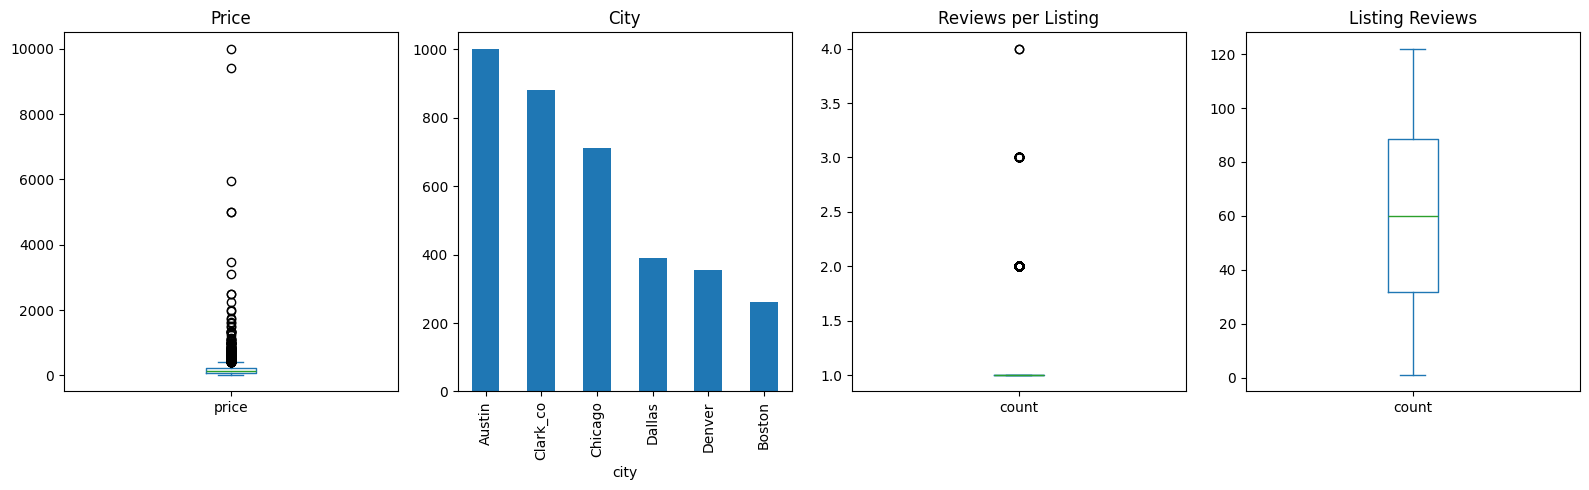

In [21]:
# fig shows range of prices, cities, listing reviews
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
sample_city['price'].plot(kind='box', title='Price', ax=axes[0])
sample_city['city'].value_counts().plot(kind='bar', title='City', ax=axes[1])
sample_city['listing_id'].value_counts().plot(kind='box', title='Reviews per Listing', ax=axes[2])
# adjusted to show listing reviews count, not just rep in sample
sample_listing_ids = sample_city['listing_id'].unique()
review_counts = all_city[all_city['listing_id'].isin(sample_listing_ids)]['listing_id'].value_counts()
review_counts.plot(kind='box', title='Listing Reviews', ax=axes[3])
plt.tight_layout()
plt.savefig('sample_city.png')
plt.show()

In [ ]:
# export
sample_city.to_csv(r"C:\Users\vance\Desktop\project_folder\sample_city.csv")